In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from mlp_visualization import print_ascii_mlp
from mlp_visualization import display_mlp

In [2]:
career_data_path = "../datasets/career/Data_final.csv"
career_df = pd.read_csv(career_data_path)

career_df.head()

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career
0,5.45,8.67,3.45,5.34,4.23,9.23,4.56,6.78,7.89,6.12,Accountant
1,8.78,5.67,4.56,6.45,4.23,5.12,8.45,7.89,6.34,6.01,Graphic Designer
2,6.12,6.78,9.34,7.56,5.01,6.23,4.23,6.45,6.67,8.45,Salesperson
3,9.12,8.78,4.23,5.67,4.56,7.89,5.34,6.45,9.34,7.67,Research Scientist
4,6.45,7.56,5.67,9.12,4.23,5.34,4.01,6.23,5.78,8.67,Teacher


In [3]:
target_column = "Career"

features_list = career_df.columns.to_list()
features_list.remove(target_column)

number_of_rows = len(career_df)
number_of_features = len(features_list)

print(f"The data has {number_of_rows} rows.\n")

print(f"The data has {number_of_features} features:")
for feature in features_list:
    print(f"    - {feature}")
print()

label_strings = career_df[target_column].to_list()


def check_for_duplicates(input_list):
    """Checks a list for duplicates"""
    input_list_no_duplicates = set(input_list)
    has_duplicates = len(input_list) != len(input_list_no_duplicates)
    return has_duplicates, input_list_no_duplicates


repeated_labels, unique_label_strings = check_for_duplicates(label_strings)

if repeated_labels:
    print("The data has repeated labels.")
else:
    print("The data does not have repeated labels.")
print()

print(f"The data has {len(label_strings)} labels:")
for target_column_raw_string in label_strings:
    print(f"    - {target_column_raw_string}")
print()

print(f"The data has {len(unique_label_strings)} unique labels:")
for unique_label in unique_label_strings:
    print(f"    - {unique_label}")
print()

The data has 105 rows.

The data has 10 features:
    - O_score
    - C_score
    - E_score
    - A_score
    - N_score
    - Numerical Aptitude
    - Spatial Aptitude
    - Perceptual Aptitude
    - Abstract Reasoning
    - Verbal Reasoning

The data has repeated labels.

The data has 105 labels:
    - Accountant
    - Graphic Designer
    - Salesperson
    - Research Scientist
    - Teacher
    - Architect
    - Nurse
    - Software Developer
    - Psychologist
    - Chef
    - Marketing Manager
    - Physician
    - Artist
    - Human Resources Manager
    - Construction Engineer
    - Journalist
    - Astronomer
    - Financial Analyst
    - Biologist
    - Event Planner
    - Real Estate Agent
    - Environmental Scientist
    - Lawyer
    - IT Support Specialist
    - Fashion Designer
    - Marketing Coordinator
    - Biomedical Engineer
    - Event Photographer
    - Data Analyst
    - Pharmacist
    - Social Worker
    - Financial Planner
    - Biotechnologist
    - HR Recruite

In [4]:
# Build a basic autoencoder
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

features_df = career_df[features_list]
features_array_x = features_df.to_numpy()

number_of_inputs = number_of_features
number_of_outputs = number_of_features
number_of_intermediate = 5
number_of_latent_variables = 1

autoencoder_structure = (
    number_of_inputs,
    number_of_inputs,
    number_of_intermediate,
    number_of_intermediate,
    number_of_latent_variables,
    number_of_intermediate,
    number_of_intermediate,
    number_of_inputs,
    number_of_inputs,
)
scaler = StandardScaler()
features_array_x_scaled = scaler.fit_transform(features_array_x)
autoencoder_mlp = MLPRegressor(
    hidden_layer_sizes=autoencoder_structure,
    max_iter=10000,
    tol=1e-7,
    n_iter_no_change=10,
    activation="relu",
    solver="adam",
    random_state=123,
)

In [5]:
# Fit the autoencoder by making it predict its features from the latent space
autoencoder_mlp.fit(features_array_x_scaled, features_array_x_scaled)

MLPRegressor(hidden_layer_sizes=(10, 10, 5, 5, 1, 5, 5, 10, 10), max_iter=10000,
             random_state=123, tol=1e-07)

In [6]:
# Test the autoencoder by seeing how well it reconstructs its features
predicted_features = autoencoder_mlp.predict(features_array_x_scaled)

mse = mean_squared_error(features_array_x_scaled, predicted_features)

print(
    f"The autoencoder reconstructs its features from {number_of_latent_variables} latent variable with MSE = {mse}"
)

The autoencoder reconstructs its features from 1 latent variable with MSE = 0.26675104234269365


Layer   0:  .  .  .  .  .  .  .  .  .  .       |    X_1 = PHI(X_0  X  W_0 in M^(10 X 10))
Layer   1:  .  .  .  .  .  .  .  .  .  .       |    X_2 = PHI(X_1  X  W_1 in M^(10 X 10))
Layer   2:  .  .  .  .  .  .  .  .  .  .       |    X_3 = PHI(X_2  X  W_2 in M^(10 X 5))
Layer   3:  .  .  .  .  .                      |    X_4 = PHI(X_3  X  W_3 in M^(5 X 5))
Layer   4:  .  .  .  .  .                      |    X_5 = PHI(X_4  X  W_4 in M^(5 X 1))
Layer   5:  .                                  |    X_6 = PHI(X_5  X  W_5 in M^(1 X 5))
Layer   6:  .  .  .  .  .                      |    X_7 = PHI(X_6  X  W_6 in M^(5 X 5))
Layer   7:  .  .  .  .  .                      |    X_8 = PHI(X_7  X  W_7 in M^(5 X 10))
Layer   8:  .  .  .  .  .  .  .  .  .  .       |    X_9 = PHI(X_8  X  W_8 in M^(10 X 10))
Layer   9:  .  .  .  .  .  .  .  .  .  .       |    X_10 = PHI(X_9  X  W_9 in M^(10 X 10))


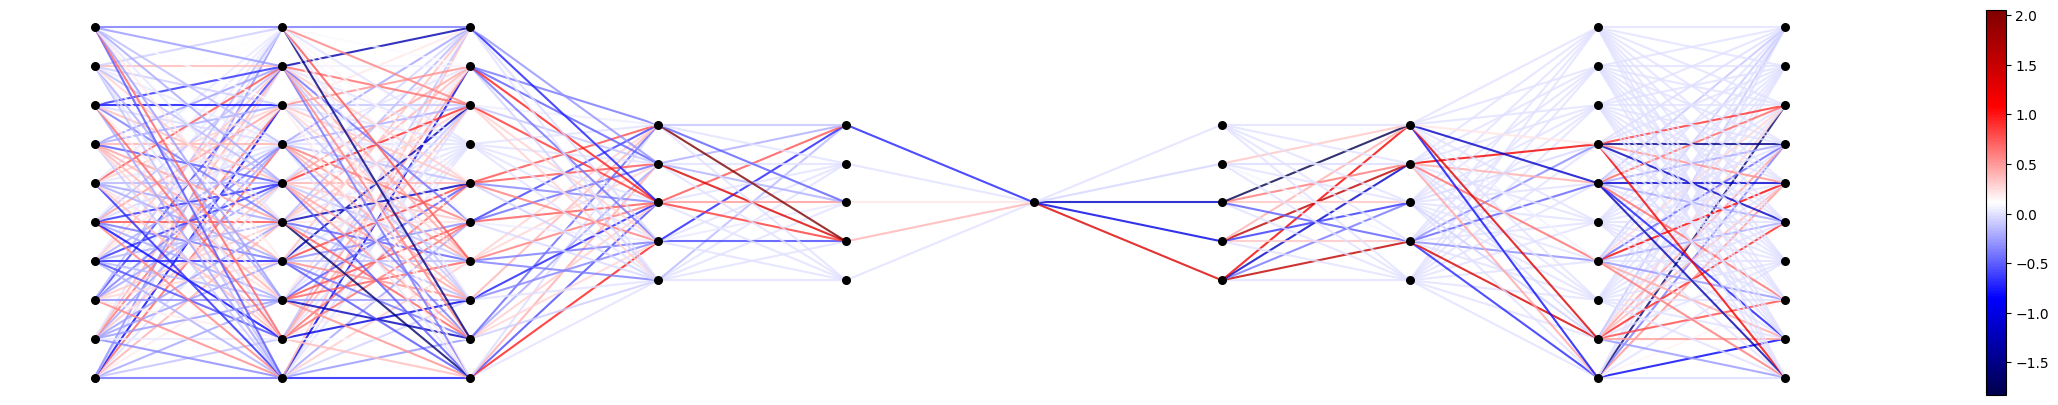

In [7]:
print_ascii_mlp(autoencoder_mlp)

_ = display_mlp(
    autoencoder_mlp,
    linewidth=1.5,
    neuron_alpha=1,
    neuron_color="black",
    line_alpha=0.8,
    figure_width=30,
    figure_height=5,
    neuron_size=30,
    colormap_name="seismic",
)